# Exploratory Data Analysis (EDA) of the Lynx-ID dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset.csv")
df

,filepath,lynx_id,source,pattern,date,location,image_number
0,/gpfsscratch/rech/ads/commun/datasets/extracte...,Van-Gogh,OCS,NaN,2012-04-27,NaN,5
1,/gpfsscratch/rech/ads/commun/datasets/extracte...,Van-Gogh,OCS,NaN,2012-05-05,NaN,1
2,/gpfsscratch/rech/ads/commun/datasets/extracte...,Van-Gogh,OCS,NaN,2012-03-17,NaN,3
3,/gpfsscratch/rech/ads/commun/datasets/extracte...,Van-Gogh,OCS,NaN,2012-03-16,NaN,6
4,/gpfsscratch/rech/ads/commun/datasets/extracte...,Van-Gogh,OCS,NaN,2012-03-05,NaN,7
...,...,...,...,...,...,...,...
3323,/gpfsscratch/rech/ads/commun/datasets/extracte...,679=L192,OFB,SPOTS,2015-07-21,Goumois,4
3324,/gpfsscratch/rech/ads/commun/datasets/extracte...,679=L192,OFB,SPOTS,2015-07-21,Goumois,3
3325,/gpfsscratch/rech/ads/commun/datasets/extracte...,679=L192,OFB,SPOTS,2015-07-21,Goumois,1
3326,/gpfsscratch/rech/ads/commun/datasets/extracte...,1017,OFB,SPOTS,2017-08-08,Chaux-Neuve,2


In [3]:
df.describe()

,filepath,lynx_id,source,pattern,date,location,image_number
count,3328,3328,3328,3196,3300,3109,3328
unique,3328,272,2,2,1124,371,253
top,/gpfsscratch/rech/ads/commun/datasets/extracte...,F39-060,OFB,OCELLES,2011-05-03,Syam,2
freq,1,250,3196,2393,82,105,272


Convert the values in the "date" column into datetime. The format most often found is YYYY-MM-DD but sometimes day and month are reversed. Some other strange dates are also printed (replaced by NaT).

In [4]:
from datetime import datetime

def convert_date(date_str):
    if pd.isna(date_str):
        return None
    try:
        return datetime.strptime(date_str, "%Y-%m-%d")
    except ValueError:
        try:
            return datetime.strptime(date_str, "%Y-%d-%m")
        except ValueError:
            print(date_str)
            return None
        
df["date"] = df["date"].apply(convert_date)

2021
2021
2021
2021
2021
2021-13-13
2021-13-13
2022
2022
2022
2022
2019
2019


### NaN values

In [5]:
percentages_na = df.loc[:, df.columns != "filepath"].apply(lambda col: col.isna().mean() * 100)
percentages_na

lynx_id         0.000000
source          0.000000
pattern         3.966346
date            1.231971
location        6.580529
image_number    0.000000
dtype: float64

### Number of images per pattern

In [6]:
df["pattern"].value_counts()

OCELLES    2393
SPOTS       803
Name: pattern, dtype: int64

In [7]:
df.iloc[874]

filepath        /gpfsscratch/rech/ads/commun/datasets/extracte...
lynx_id                                              F39-095=1556
source                                                        OFB
pattern                                                   OCELLES
date                                          2021-10-10 00:00:00
location                                         Chaux-Du-Dombief
image_number                                                   34
Name: 874, dtype: object

### Number of images per individuals

In [8]:
nb_images_per_individuals = df["lynx_id"].value_counts()

print(f"{len(nb_images_per_individuals)} unique individuals")
nb_images_per_individuals

272 unique individuals


F39-060         250
F39-054          90
163              82
F25-008          74
F39-095=1556     69
               ... 
2661              2
2756              2
2109              2
1018              2
1017              2
Name: lynx_id, Length: 272, dtype: int64

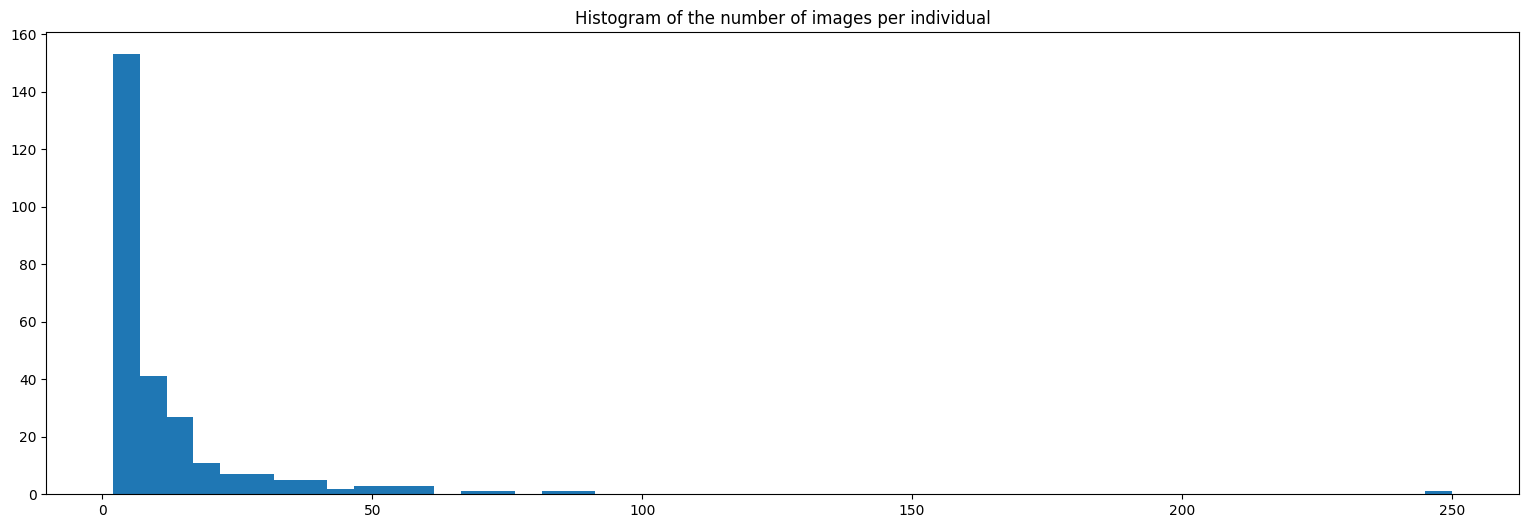

In [9]:
plt.figure(figsize=(19, 6))
plt.hist(nb_images_per_individuals, bins=50)
plt.title("Histogram of the number of images per individual")
plt.show()

In [10]:
print(f"On average, there are {np.mean(nb_images_per_individuals)} images per individual")

On average, there are 12.235294117647058 images per individual


In [11]:
print(f"{len(nb_images_per_individuals[nb_images_per_individuals < 3])} individuals have less than 3 images")

64 individuals have less than 3 images


### Location

In [12]:
df["location"].value_counts()

Syam                        105
Contrevoz                    90
Les-Planches-En-Montagne     88
Les-Combes                   82
Orchamps-Vennes              70
                           ... 
Saint-Sorlin                  1
Innimond                      1
Saint-Christophe              1
Vuillierens                   1
Lac-Des-Rouges-Truites        1
Name: location, Length: 371, dtype: int64

### Date

In [13]:
oldest_date = df["date"].min()
latest_date = df["date"].max()

print(f"Oldest date: {oldest_date}")
print(f"Latest date: {latest_date}")

Oldest date: 2006-01-01 00:00:00
Latest date: 2022-12-08 00:00:00


Text(0.5, 1.0, 'Date distribution')

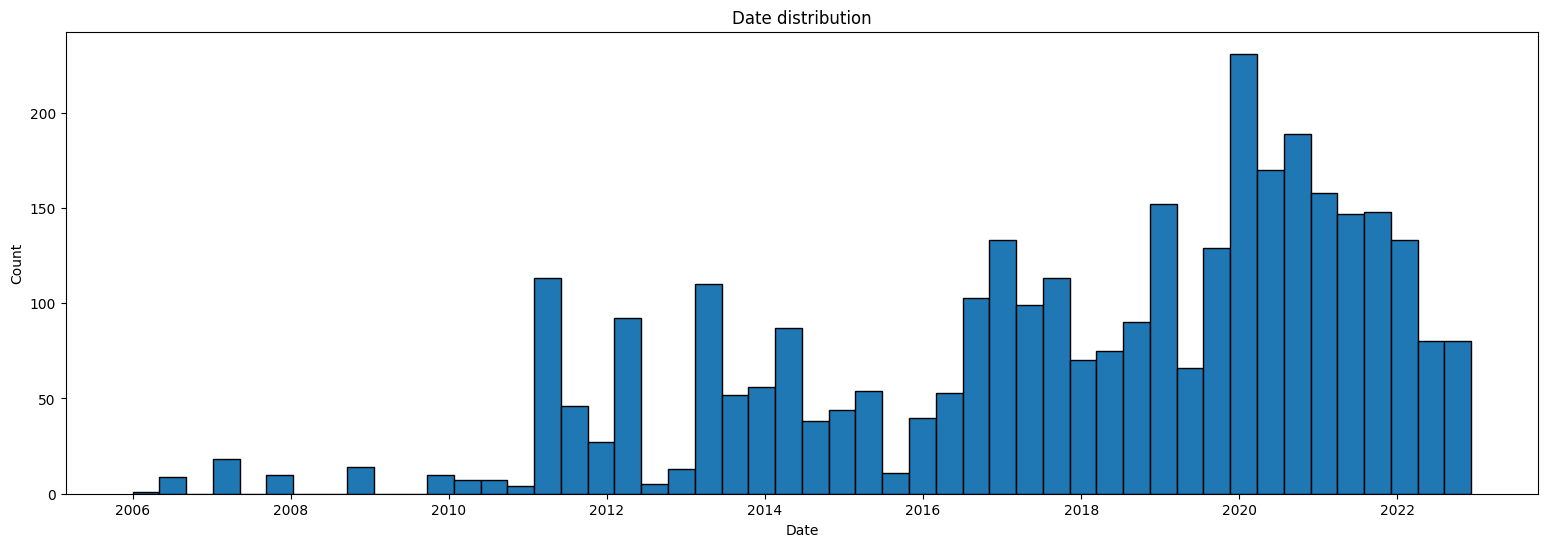

In [14]:
plt.figure(figsize=(19, 6))
plt.hist(df["date"], bins=50, edgecolor="black")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Date distribution")

### Image dimensions

In [15]:
import sys
sys.path.append("../")

from data_pipeline.dataset import LynxDataset
from pathlib import Path

/gpfslocalsup/pub/anaconda-py3/2023.03/envs/pytorch-gpu-2.0.0+py3.10.9/lib/python3.10/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
/gpfslocalsup/pub/anaconda-py3/2023.03/envs/pytorch-gpu-2.0.0+py3.10.9/lib/python3.10/site-packages/torchvision-0.15.1a0+42759b1-py3.10-linux-x86_64.egg/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/gpfs7kro/gpfslocalsup/pub/anaconda-py3/2023.03/envs/pytorch-gpu-2.0.0+py3.10.9/lib/python3.10/site-packages/torchvision-0.15.1a0+42759b1-py3.10-linux-x86_64.egg/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  wa

In [16]:
lynxDataset = LynxDataset(Path("/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset.csv"))

In [17]:
lynxDataset.__len__()

3328

(2000, 2592, 3)


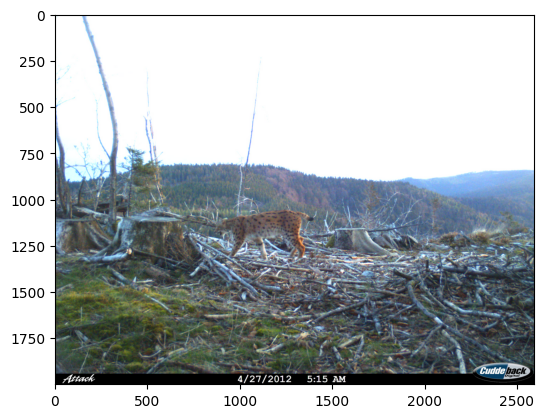

In [18]:
image = lynxDataset.__getitem__(0)[0]['image']
plt.imshow(image)
print(image.shape)

In [19]:
heights = []
widths = []

for i, image_i in enumerate(lynxDataset):
    print(i, end="\r")
    try:
        heights.append(image_i[0]['image'].shape[0])
        widths.append(image_i[0]['image'].shape[1])
    except:
        print(i, df.iloc[i]['filepath'])
        continue

In [20]:
average_width = sum(widths)/len(widths)
average_height = sum(heights)/len(heights)

print('Average width: {} and height: {}'.format(average_width, average_height))

Average width: 2284.072716346154 and height: 1642.4408052884614


#### Distribution of image dimensions

Text(0.5, 1.0, 'Plot of image dimensions')

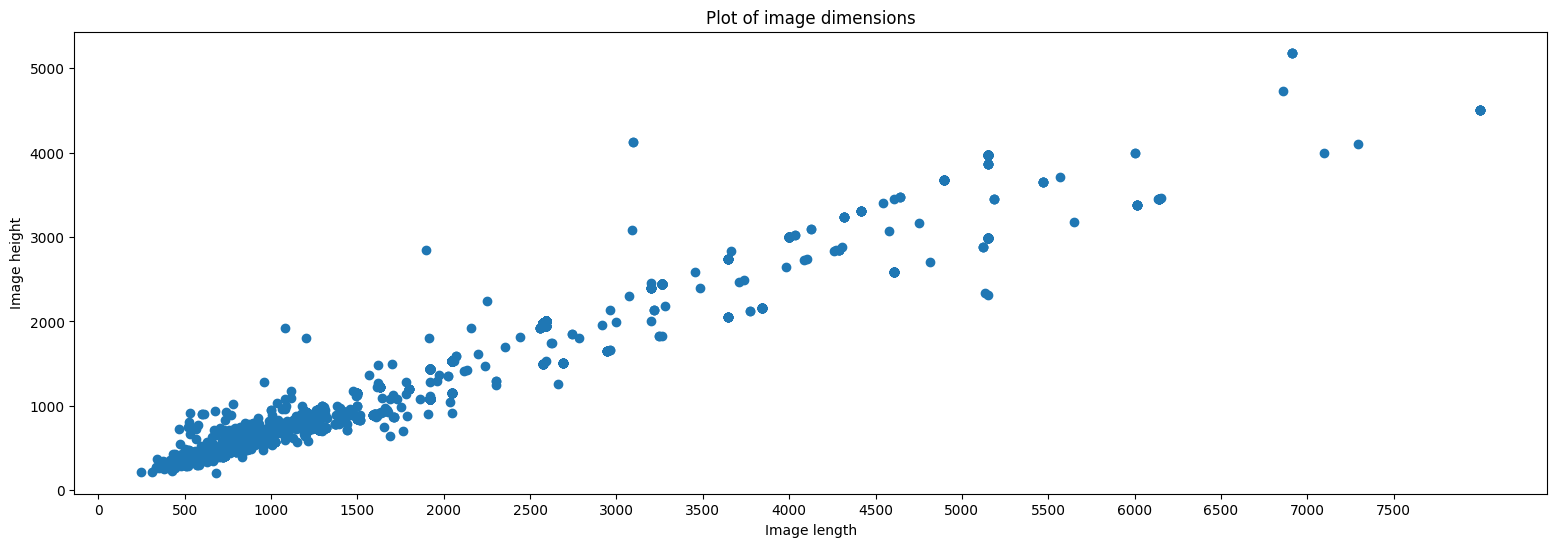

In [21]:
plt.figure(figsize=(19, 6))
plt.scatter(widths, heights)
x_tick_interval = 500
tick_positions = np.arange(0, max(widths), x_tick_interval)
plt.xticks(tick_positions)
plt.xlabel('Image length')
plt.ylabel('Image height')
plt.title('Plot of image dimensions')

In [22]:
print(f"Lowest height : {min(heights)}")
print(f"Highest height : {max(heights)}")

print(f"Lowest width : {min(widths)}")
print(f"Highest widths : {max(widths)}")

Lowest height : 208
Highest height : 5184
Lowest width : 249
Highest widths : 8000


In [23]:
dimensions = list(zip(widths, heights))
smallest_dimension = min(dimensions, key=lambda x: x[0] + x[1])
print(f"Smallest image dimension: {smallest_dimension}")

highest_dimension = max(dimensions, key=lambda x: x[0] + x[1])
print(f"Highest image dimension: {highest_dimension}")

Smallest image dimension: (249, 220)
Highest image dimension: (8000, 4500)


#### Width and height distribution

Text(0.5, 1.0, 'Image height')

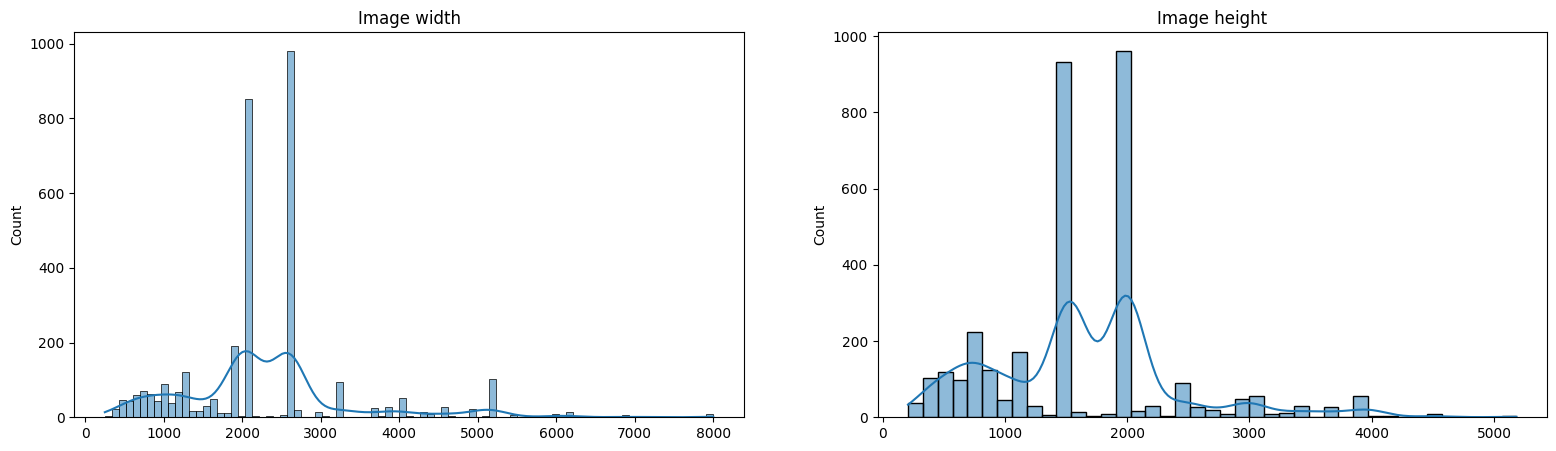

In [24]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(19, 5))

sns.histplot(widths, kde=True, ax=axes[0])
axes[0].set_title("Image width")
sns.histplot(heights, kde=True, ax=axes[1])
axes[1].set_title("Image height")

#### Ratio distribution

In [25]:
ratios = []
for height, width in zip(heights, widths):
    ratios.append(width/height)
        
print(f"Mean ratio: {np.mean(ratios)}")

Mean ratio: 1.409923693534824


Text(0.5, 1.0, 'Ratio distribution')

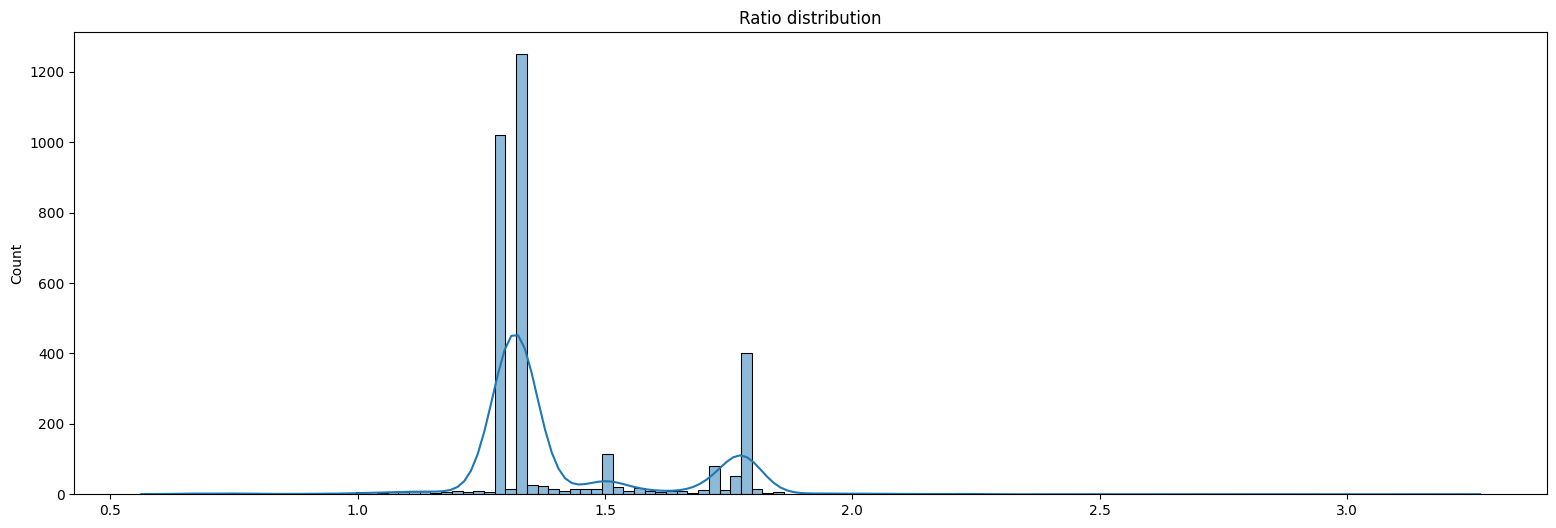

In [26]:
plt.figure(figsize=(19, 6))
sns.histplot(ratios, kde=True)
plt.title("Ratio distribution")

### Image color (coloured or black and white image)

In [27]:
def is_black_and_white(img, threshold=10, show_score=False):
    diff_rg = np.abs(img[:, :, 0] - img[:, :, 1])
    diff_gb = np.abs(img[:, :, 1] - img[:, :, 2])
    diff_rb = np.abs(img[:, :, 0] - img[:, :, 2])
    
    avg_diff = (diff_rg + diff_gb + diff_rb) / 3
    
    if show_score:
        print(np.mean(avg_diff))
    
    is_bw = np.mean(avg_diff) < threshold
    
    return is_bw

0.4306617283950618


True

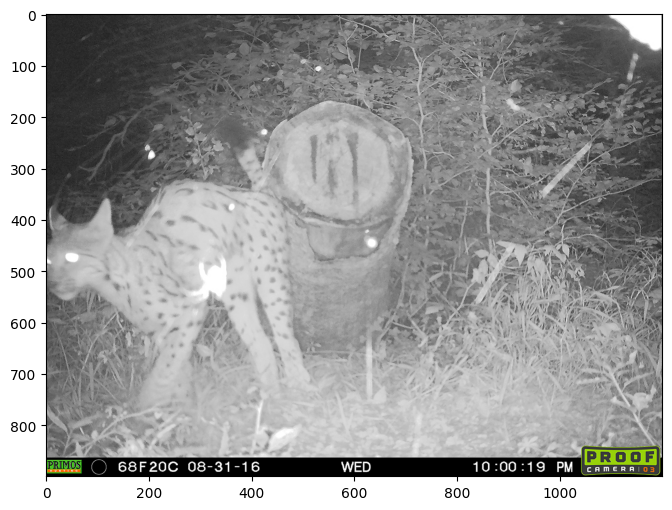

In [28]:
img = lynxDataset[34][0]['image']
plt.figure(figsize=(19, 6))
plt.imshow(img)

is_black_and_white(img, threshold=10, show_score=True)

In [29]:
is_coloured = []

for i, image_i in enumerate(lynxDataset):
    print(i, end="\r")
    try:
        if is_black_and_white(image_i[0]['image']):
            is_coloured.append(False)
        else:
            is_coloured.append(True)
    except:
        print(f"Problem with image {i}")
        continue

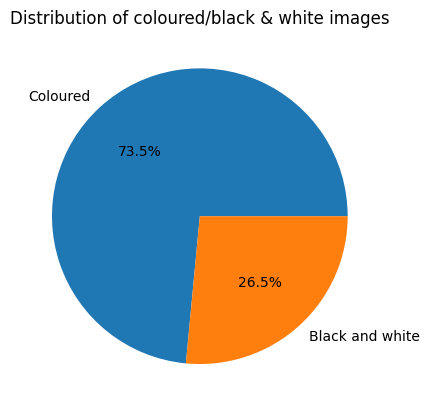

In [30]:
nb_coloured = is_coloured.count(True)
nb_bw = is_coloured.count(False)

plt.pie([nb_coloured, nb_bw], labels=['Coloured', 'Black and white'], autopct='%1.1f%%')
plt.title('Distribution of coloured/black & white images')
plt.show()